In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("rawdata.csv")
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [6]:
x=df[["continent","location","total_deaths","new_deaths"]]
x.head()

,continent,location,total_deaths,new_deaths
0,Asia,Afghanistan,NaN,NaN
1,Asia,Afghanistan,NaN,NaN
2,Asia,Afghanistan,NaN,NaN
3,Asia,Afghanistan,NaN,NaN
4,Asia,Afghanistan,NaN,NaN


In [7]:
y = pd.DataFrame({'location': ["UK", "Italy" , "Russia","France","Germany"],
                   'mean_smokers': [22.35,23.80,40.85,32.85,30.65],
                  'total_deaths': [127224.0,112861.0,100158.0,98196.0,78049.0]
                 
                 
                 },
                  index=['1', '2',"3","4","5"])
y

,location,mean_smokers,total_deaths
1,UK,22.35,127224.0
2,Italy,23.80,112861.0
3,Russia,40.85,100158.0
4,France,32.85,98196.0
5,Germany,30.65,78049.0


In [59]:
data_smokers = df[["total_deaths", "continent", "date", "location", "female_smokers", "male_smokers"]]

data_smokers_EU = data_smokers[data_smokers["continent"] == "Europe"]
data_smokers_EU_08_04_2021 = data_smokers_EU[data_smokers_EU["date"] == "2021-04-08"]


data_smokers_EU_top10 = data_smokers_EU_08_04_2021.groupby("location").sum().sort_values("total_deaths", ascending=False).head(10)


data_smokers_EU_top10["mean_smokers"]=data_smokers_EU_top10["female_smokers"]/2 + data_smokers_EU_top10["male_smokers"]/2
data_smokers_EU_top10_mean = data_smokers_EU_top10
data_smokers_EU_top10_mean


,total_deaths,female_smokers,male_smokers,mean_smokers
location,,,,
United Kingdom,127224.0,20.0,24.7,22.35
Italy,112861.0,19.8,27.8,23.80
Russia,100158.0,23.4,58.3,40.85
France,98196.0,30.1,35.6,32.85
Germany,78049.0,28.2,33.1,30.65
Spain,76179.0,27.4,31.4,29.40
Poland,56659.0,23.3,33.1,28.20
Ukraine,37649.0,13.5,47.4,30.45
Czechia,27466.0,30.5,38.3,34.40


In [62]:
x=data_smokers_EU_top10_mean[["total_deaths"]]
x.head()

,total_deaths
location,
United Kingdom,127224.0
Italy,112861.0
Russia,100158.0
France,98196.0
Germany,78049.0


In [64]:
y=data_smokers_EU_top10_mean[["mean_smokers"]]
y.head()


,mean_smokers
location,
United Kingdom,22.35
Italy,23.80
Russia,40.85
France,32.85
Germany,30.65


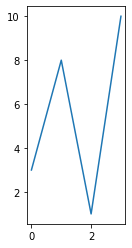

In [81]:
#plot 1:
x = np.array([0,1,2,3])
y = np.array([3, 8, 1, 10])

plt.subplot(1,3,2)
plt.plot(x,y)

#plot 2:
#x = np.array([0, 1, 2, 3])
#y = np.array([10, 20, 30, 40])

#plt.subplot(1, 2, 2)
#plt.plot(x,y)

plt.show()

<AxesSubplot:xlabel='location'>

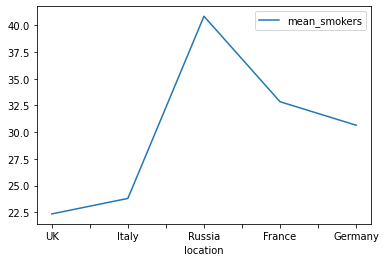

In [36]:
z= y.set_index("location")
z.plot(y="mean_smokers")

<AxesSubplot:xlabel='location'>

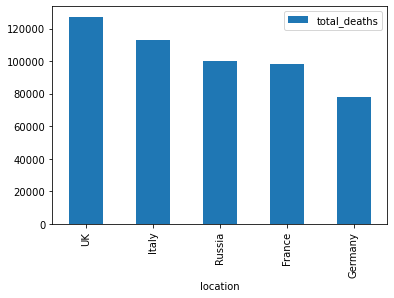

In [35]:
z.plot.bar(y="total_deaths")